# Draft analysis 

---

Group name: Lena Breitberg, Ji Huixiao, Paraskevas Papadopoulos

---


## Introduction

*This section includes an introduction to the project motivation, data, and research question. Include a data dictionary* 

## Setup

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns  

# seaborn settings
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

import altair as alt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Daten

## Daten importieren

In [2]:
# Daten importieren
ROOT = "https://raw.githubusercontent.com/hdm-statistik-lpj/project/main/data/external/"
DATA = "immobilienNuernberg.csv"
df = pd.read_csv(ROOT + DATA)

### Datenstruktur

In [3]:
# Zeige die ersten Zeilen
pd.set_option('display.max_columns', None)
df.head()

,General.EstateTypeKey,General.ReferenceNumber,General.DistributionTypeKey,General.ConstructionYear,General.LivingSpace,Tealium.object_locationid,Tealium.object_address_is_visible,Tealium.object_zip,Tealium.object_currency,Tealium.object_features,Tealium.object_objektart_sub,Tealium.expose_type,Tealium.broker_guid,Tealium.object_count_photos,LocalRatings.scores.local_amenities,LocalRatings.scores.mobility,MetaBadges,Price.AdditionalInformation.Commission.CommissionType,EstateAddress.City,EstateAddress.ZipCode,EstateAddress.Street,Offerer.addressGuid,Offerer.globalUserId,Offerer.contactData.companyName,Project.Address.PostCode,Project.Address.Street,Project.Address.HouseNumber,Latitude,Longitude,Stadtteil,Stadt,PRICE,ROOMS,PRICE_COMMONCHARGE,EnergyType,Class,Value,CATEGORY,FLOOR,USAGE,SUITABILITY,CONDITION,HOUSECONDITION,PARKINGSLOT,ENERGY,BUILDINGTYPE,HEATING,ELEVATOR,EQUIPMENTS
0,WOHNUNG,001/G1/E114,ZUM_KAUF,2023.0,247.07,493480,True,90482,EUR,"['Neubau', 'WANNE', 'gaestewc', 'Bad/WC getren...",wohnung,project,4821481,15.0,7.7,9.5,"[{'label': 'Provisionsfrei', 'highlight': True}]",COMMISSION_FREE,Nürnberg,90482,Ostendstraße 120,69C9B07CBE7147ED868C55D3368C8261,4821481,Instone Real Estate Development GmbH Niederlas...,90482.0,Ostendstraße,115,49.45760,11.13188,Mögeldorf,Nürnberg,2539000.0,7.0,NaN,NaN,NaN,NaN,NaN,11. Geschoss,NaN,NaN,Erstbezug,Neubau,Tiefgarage,NaN,NaN,Fußbodenheizung,Personenaufzug,NaN
1,WOHNUNG,NaN,ZUM_KAUF,1900.0,69.00,493430,False,90461,EUR,"['Dach ausgebaut', 'WANNE', 'gaestewc', 'Bad/W...",MAISONETTE,standard,2704438,23.0,6.5,9.7,[],COMMISSION_REQUIRED,Nürnberg,90461,NaN,96453B9B5899480AB506126D5E0E9140,2704438,Immobilien Büro Franken24 UG (haftungsbeschränkt),NaN,NaN,NaN,49.42749,11.07581,Gibitzenhof,Nürnberg,225000.0,2.0,280.0,NaN,NaN,NaN,Maisonette,4. Geschoss (Dachgeschoss),vermietet,WG-geeignet,renoviert / saniert,NaN,NaN,Gas,NaN,Etagenheizung,NaN,NaN
2,WOHNUNG,NaN,ZUM_KAUF,1972.0,69.46,493465,False,90473,EUR,"['WANNE', 'GEPFLEGT', 'FERN', 'LAMINAT', 'FLIE...",wohnung,standard,7111707,1.0,5.7,7.8,[],COMMISSION_DEFAULT,Nürnberg,90473,NaN,9C587ED116BD427E9DD13790553F0A5F,7111707,W &a; F Liegenschaften GmbH,NaN,NaN,NaN,49.40815,11.13376,Langwasser,Nürnberg,195000.0,3.0,283.0,NaN,NaN,NaN,NaN,8. Geschoss,vermietet,NaN,gepflegt,NaN,Tiefgarage,Fernwärme,NaN,NaN,NaN,NaN
3,WOHNUNG,X4_301,ZUM_KAUF,2023.0,82.81,493524,True,90429,EUR,"['Neubau', 'DUSCHE', 'Personenaufzug', 'ERSTBE...",wohnung,project,53124,6.0,8.2,9.6,"[{'label': 'Provisionsfrei', 'highlight': True}]",COMMISSION_FREE,Nürnberg,90429,Maximilianstraße 56,F2237DED191344059DB32E4F5C9709F0,53124,EcoLoft Gruppe AG,90429.0,Maximilianstraße,56,49.46008,11.04266,Seeleinsbühl,Nürnberg,483623.0,3.0,NaN,UNDEFINED,DE_ENV2014_CLASS_A_PLUS,24.5,NaN,3. Geschoss,NaN,NaN,Erstbezug,Neubau,NaN,Blockheizkraftwerk,KfW 55,Fußbodenheizung,Personenaufzug,NaN
4,WOHNUNG,X4_204,ZUM_KAUF,2023.0,75.52,493524,True,90429,EUR,"['Neubau', 'DUSCHE', 'Personenaufzug', 'Erdges...",wohnung,project,53124,6.0,8.2,9.6,"[{'label': 'Provisionsfrei', 'highlight': True}]",COMMISSION_FREE,Nürnberg,90429,Maximilianstraße 56,F2237DED191344059DB32E4F5C9709F0,53124,EcoLoft Gruppe AG,90429.0,Maximilianstraße,56,49.46008,11.04266,Seeleinsbühl,Nürnberg,433956.0,3.0,NaN,UNDEFINED,DE_ENV2014_CLASS_A_PLUS,24.5,NaN,2. Geschoss (Erdgeschoss),NaN,NaN,Erstbezug,Neubau,NaN,Blockheizkraftwerk,KfW 55,Fußbodenheizung,Personenaufzug,NaN


In [4]:
# Datenübersicht (mit Metadaten)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 49 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   General.EstateTypeKey                                  961 non-null    object 
 1   General.ReferenceNumber                                832 non-null    object 
 2   General.DistributionTypeKey                            961 non-null    object 
 3   General.ConstructionYear                               961 non-null    float64
 4   General.LivingSpace                                    961 non-null    float64
 5   Tealium.object_locationid                              961 non-null    int64  
 6   Tealium.object_address_is_visible                      961 non-null    bool   
 7   Tealium.object_zip                                     961 non-null    int64  
 8   Tealium.object_currency                           

In [5]:
# Zeige alle Variablen im Datensatz
df.columns

Index(['General.EstateTypeKey', 'General.ReferenceNumber',
       'General.DistributionTypeKey', 'General.ConstructionYear',
       'General.LivingSpace', 'Tealium.object_locationid',
       'Tealium.object_address_is_visible', 'Tealium.object_zip',
       'Tealium.object_currency', 'Tealium.object_features',
       'Tealium.object_objektart_sub', 'Tealium.expose_type',
       'Tealium.broker_guid', 'Tealium.object_count_photos',
       'LocalRatings.scores.local_amenities', 'LocalRatings.scores.mobility',
       'MetaBadges', 'Price.AdditionalInformation.Commission.CommissionType',
       'EstateAddress.City', 'EstateAddress.ZipCode', 'EstateAddress.Street',
       'Offerer.addressGuid', 'Offerer.globalUserId',
       'Offerer.contactData.companyName', 'Project.Address.PostCode',
       'Project.Address.Street', 'Project.Address.HouseNumber', 'Latitude',
       'Longitude', 'Stadtteil', 'Stadt', 'PRICE', 'ROOMS',
       'PRICE_COMMONCHARGE', 'EnergyType', 'Class', 'Value', 'CATEGORY',

### Datenkorrekturen

#### Umbenennung der in der Analyse verwendeten Spalten

In [6]:
df.rename(columns={
    # Allgemeine Immobilieninformationen
    'General.EstateTypeKey': 'estateTypeKey',            # Immobilientyp (Wohungen)
    'General.ReferenceNumber': 'referenceNumber',        # Referenznummer für Duplikatsuche
    'General.DistributionTypeKey': 'distributionTypeKey', # Neubau- oder Bestandswohnung 
    'General.ConstructionYear': 'constructionYear',      # Baujahr der Immobilie
    'General.LivingSpace': 'livingSpace',                # Wohnfläche in Quadratmetern

    # Tealium Objektinformationen
    'Tealium.object_features': 'objectFeatures',         # Weitere Merkmale der Immobilie
    'Tealium.broker_guid': 'brokerGuid',                 # Makler-ID
    'Tealium.object_count_photos': 'photosCount',        # Anzahl der Fotos (Marketing)

    # Bewertungen vor Ort
    'LocalRatings.scores.local_amenities': 'localAmenitiesScore', # Bewertung der lokalen Annehmlichkeiten
    'LocalRatings.scores.mobility': 'localMobilityScore',         # Bewertung der Mobilität und Verkehrsanbindung

    # Metainformationen
    'MetaBadges': 'metaBadges', # Metabadge-Informationen, wie "Zwangsversteigerung"

    # Preis- und Provisionsinformationen
    'PRICE': 'price', # Preis der Wohnung

    # Informationen über den Anbieter
    'Tealium.broker_guid': 'brokerGuid', # Makler-Anbieter-ID

    # Standortinformationen
    'Latitude': 'latitudeDistrict',  # Breitengrad des Stadtteils
    'Longitude': 'longitudeDistrict',  # Längengrad des Stadtteils
    'Stadtteil': 'district',  # Stadtteil
    'Stadt': 'town',  # Überprüfung, ob alle Wohnungen in Nürnberg sind

    # Energieinformationen
    'Class': 'energyClass',        # Energieeffizienzklasse
    'Value': 'energyConsumption',  # Zur Schätzung von energyClass bei fehlenden Werten

    # Informationen zu den Zimmern
    'ROOMS': 'rooms',  # Anzahl der Zimmer

    # Weitere Einzelheiten zur Immobilie
    'FLOOR': 'floor',          # Etage
    'PARKINGSLOT': 'parkingSlot', # Parkplatz verfügbar
    'ENERGY': 'energy',        # Hauptenergieträger
    'ELEVATOR': 'elevator',    # Aufzug vorhanden

}, inplace=True)

#### Prüfung auf Duplikate

Wir suchen nach Duplikaten in den Referenznummern (referenceNumber) innerhalb desselben Maklers (Gruppierungsvariable: brokerGuid), da Duplikate nur innerhalb desselben Maklers auftreten können. Die Annahme ist, dass Eigentümer nur einen Makler beauftragen, um mögliche höhere Maklerkosten zu vermeiden.

Darüber hinaus überprüfen wir, ob der Datensatz identische Datensätze enthält.

Die Variablen, die für diese Prüfungen verwendet wurden, werden anschließend aus dem DataFrame entfernt, da sie voraussichtlich keinen weiteren Mehrwert bieten.

In [7]:
#  Gruppierung anhand von 'brokerGuid' und 'referenceNumber'
duplicateCount = df.groupby(['brokerGuid', 'referenceNumber']).size().reset_index(name='Duplicate Count').sort_values(by='Duplicate Count', ascending=False)
#print(duplicateCount)

# Prüfung auf Duplikate
if duplicateCount['Duplicate Count'].eq(1).all():
    print("Keine Duplikate innerhalb desselben Maklers gefunden")

# Überprüfung auf identische Zeilen
identicalRows = df[df.duplicated()]
if identicalRows.empty:
    print("Keine identischen Zeilen gefunden")

Keine Duplikate innerhalb desselben Maklers gefunden
Keine identischen Zeilen gefunden


In [8]:
df.drop(columns=['referenceNumber', 'brokerGuid'], inplace=True)

#### Immobiliendaten aus "Tealium.object_features" extrahieren und Erstellung von Dummy-Variablen

Die Variable 'Tealium.object_features' enthält verschiedene Merkmale für einzelne Immobilien. In unserem Vorgehen beabsichtigen wir, basierend auf den darin vorkommenden Wörtern Dummy-Variablen zu erstellen. Dabei werden nur solche Merkmale berücksichtigt, von denen wir annehmen, dass sie einen klaren Verkaufsvorteil bieten und die von jedem Verkäufer angegeben werden.

Da es wahrscheinlich ist, dass diese Variable bei Immowelt eine Kombination aus Auswahlfeldern und Freitextfeldern ist, legen wir besonderen Wert auf die Identifizierung ähnlicher Schreibweisen und Synonyme für diese Merkmale. 

Nachdem die Dummy-Variablen erstellt wurden, entfernen wir die Variable 'Tealium.object_features' aus dem DataFrame, da sie voraussichtlich keine weiteren Mehrwerte für unsere Analyse bietet. 

In [9]:
import re
from collections import Counter

# Funktion um Wörter direkt aus einem String zu extrahieren
def extractWords(s):
    # Wörter auf Bais folgender Zeichenfolgen extrahieren
    return re.findall(r'\b\w+\b', s)

# Erstellung einer flachen Liste mit den extrahierten Wörter
directExtractedWords = df['objectFeatures'].apply(extractWords)
allWords = [word for sublist in directExtractedWords for word in sublist]

# Häufigkeit jedes Wortes
wordCounts = Counter(allWords)

# Konvertierung in einem Dataframe
words_df = pd.DataFrame(wordCounts.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
pd.set_option('display.max_rows', None)
words_df

,Word,Frequency
8,Kelleranteil,721
35,Balkon,476
9,Personenaufzug,464
24,GAS,441
1,WANNE,433
13,FLIESEN,426
6,DUSCHE,404
48,Zentralheizung,379
56,Einbauküche,353
31,Kunststofffenster,348


In [10]:
import ast  # zum Auswerten von Zeichenketten als Listen

# Funktion zum Analysieren der Zeichenketten
def parseFeatures(feature_str):
    try:
        features = ast.literal_eval(feature_str)
        if isinstance(features, list):
            return features
        else:
            return []
    except:
        return []

# Anwenden auf die Spalte 'objectFeatures'
df['objectFeatures'] = df['objectFeatures'].apply(parseFeatures)

# Erstellen von Dummy-Variablen
commonFeatures = ['Kamin','kamin', 'Personenaufzug', 'Tiefgarage', 'Stellplatz', 'Garage', 'Parkhaus', 'Carport', 'sauna', 'swimmingpool', 'KÜCHE', 'Küche', 'Einbauküche', 'Balkon', 'Terrasse', 'Garten', 'Loggia', 'Kelleranteil', 'abstellraum', 'gaestewc', 'WC', 'rollstuhlgerecht', 'BETREUTES_WOHNEN']  # Example features, need to be adjusted based on actual data

for feature in commonFeatures:
    df[feature] = df['objectFeatures'].apply(lambda x: 1 if feature in x else 0)

# Löschen der Spalte 'objectFeatures'
df.drop('objectFeatures', axis=1, inplace=True)

#### Prüfung der Suchkriterien

Um sicherzustellen, dass die ursprünglichen Suchkriterien (Wohnungen zum Kauf in Nürnberg) eingehalten werden und die Datenqualität gewährleistet ist, führen wir die folgenden Prüfungen durch:

- Berücksichtigung von Wohnungen: Wir beschränken unsere Analyse auf Wohnungen und schließen andere Arten von Immobilien aus.

- Betrachtung nur Wohnungen zum Kauf (keine Mietwohungen): Unsere Analyse konzentriert sich ausschließlich auf Wohnungen, die zum Verkauf stehen.

- Beschränkung auf Nürnberg: Unsere Analyse bezieht sich ausschließlich auf Wohnungen, die sich in der Stadt Nürnberg befinden.

Immobilien, die diese Kriterien nicht erfüllen, werden aus dem Datensatz entfernt, um die Datenqualität und Relevanz unserer Analyse sicherzustellen. Variablen, die für diese Prüfungen verwendet wurden und voraussichtlich keinen weiteren Mehrwert bieten, werden im Anschluss aus dem DataFrame entfernt.

In [11]:
# Häufigkeit bestimmen
valueCountsList = [
    df['estateTypeKey'].value_counts().rename('estateTypeCount'),
    df['distributionTypeKey'].value_counts().rename('distributionTypeKeyCount'),
    df['town'].value_counts().rename('townCount')
]

# Übersicht
combinedCounts = pd.concat(valueCountsList, axis=1, keys=[s.name for s in valueCountsList])

print(combinedCounts)

          estateTypeCount  distributionTypeKeyCount  townCount
WOHNUNG             959.0                       NaN        NaN
HAUS                  2.0                       NaN        NaN
ZUM_KAUF              NaN                     961.0        NaN
Nürnberg              NaN                       NaN      961.0


In [12]:
# Löschen der Zeilen mit "estateTypeKey" "HAUS"
df.drop(df[df['estateTypeKey'].str.contains('HAUS')].index, inplace=True)
# Löschen Variablen
df = df.drop(columns=['estateTypeKey'])

In [13]:
# Löschen Variablen
df.drop(columns=['distributionTypeKey', 'town'], inplace=True)

#### Verzehrung im Verkaufspreis

Wohnungen, die zwangsversteigert werden, weisen oft besondere Umstände auf, die ihre Preise erheblich von den Marktpreisen unterscheiden können. Daher werden diese Immobilien nicht in unsere Analyse einbezogen und aus dem Datensatz entfernt.

In [14]:
# Häufigkeit bestimmen
df['metaBadges'].value_counts()


[]                                                       667
[{'label': 'Provisionsfrei', 'highlight': True}]         251
[{'label': 'Privater Anbieter', 'highlight': True}]       30
[{'label': 'Zwangsversteigerung', 'highlight': True}]     11
Name: metaBadges, dtype: int64

In [15]:
# Löschen der Zeilen mit Label "Zwangsversteigerung"
df = df[~df['metaBadges'].astype(str).str.contains("'label': 'Zwangsversteigerung'")]
# Löschen Variablen
df.drop(columns=['metaBadges'], inplace=True)

#### Umgang mit fehlenden Werten

Fehlenden Werten in der Spalte 'photosCount' werden durch Nullen ersetzt. Diese Entscheidung basiert auf der Annahme, dass für diese Immobilie keine Bilder veröffentlicht wurden.

In [16]:
df['photosCount'].fillna(0, inplace=True)

Fehlende Werte in den Spalten 'localAmenitiesScore' und 'localMobilityScore' werden  durch den Durchschnittswert der jeweiligen Gruppe, basierend auf Längen- und Breitengrad, ersetzt. Fehlende Werte werden somit aus ähnlichen geografischen Regionen imputiert.

In [17]:
# Gruppierung nach Längen- und Breitengrad und Berechnung des Durchschnittswerts für jede Gruppe
groupedData = df.groupby(['latitudeDistrict', 'longitudeDistrict'])[['localAmenitiesScore', 'localMobilityScore']].transform(lambda x: x.fillna(x.mean()))
# Ersetze die fehlenden Werte im ursprünglichen DataFrame 'df' durch die berechneten Durchschnittswerte
df['localAmenitiesScore'] = groupedData['localAmenitiesScore']
df['localMobilityScore'] = groupedData['localMobilityScore']

Fehlende Werten in der Spalte 'parkingSlot' werden durch Nullen ersetzt und Dummy-Variablen für verschiedene Parkplatzarten wie Tiefgarage, Stellplatz, Garage usw. erstellt. Diese Informationen werden dann zu einer binären 'parkingSlots'-Dummy-Variable zusammengefasst, die angibt, ob ein privater Parkplatz vorhanden ist oder nicht. Die ursprünglichen Parkplatzspalten werden im Anschluss aus dem DataFrame entfernt.

In [18]:
# Ersetze fehlende Werte in 'parkingSlot' mit '0'
df['parkingSlot'].fillna('0', inplace=True)

# Erstellung einer Dummy-Variable für parkingSlot, Tiefgarage, Stellplatz, Garage, Parkhaus und Carport
parkingColumns = ['Tiefgarage', 'Stellplatz', 'Garage', 'Parkhaus', 'Carport', 'parkingSlot']

# Erstelle die 'parkingSlots'-Dummy-Variable durch Addition der Spalten
df['parkingSlots'] = df[parkingColumns].sum(axis=1)

# Begrenze die Werte in 'parkingSlots' auf 1, wenn sie größer als 1 sind
df['parkingSlots'] = df['parkingSlots'].apply(lambda x: min(x, 1))

df.drop(columns = parkingColumns, inplace=True)

C:\Users\papad\AppData\Local\Temp\ipykernel_8408\3131653875.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['parkingSlots'] = df[parkingColumns].sum(axis=1)


Eine Dummy-Variable namens 'guestToilet' wird erstellt, indem die Informationen aus 'gaestewc' und 'WC' zusammengeführt werden. Wenn eine dieser Toiletten vorhanden ist, wird der Wert auf 1 gesetzt, ansonsten auf 0. Die ursprünglichen Spalten werden aus dem DataFrame entfernt.

In [19]:
# Erstellung einer Dummy-Variable für gaestewc und WC
gaesteWCColumns = ['gaestewc', 'WC']

# Erstelle die 'guestToilet'-Dummy-Variable durch Addition der Spalten
df['guestToilet'] = df[gaesteWCColumns].sum(axis=1)

# Begrenze die Werte in 'gaesteWC' auf 1, wenn sie größer als 1 sind
df['guestToilet'] = df['guestToilet'].apply(lambda x: min(x, 1))

df.drop(columns = gaesteWCColumns, inplace=True)

Eine Dummy-Variable namens 'privateOutdoorSpace', die Informationen über das Vorhandensein von Balkon, Terrasse, Garten und Loggia zusammenfasst wird erstellt. Wenn einer dieser privaten Außenräume vorhanden ist, wird der Wert auf 1 gesetzt, andernfalls auf 0. Die ursprünglichen Spalten werden aus dem DataFrame entfernt.

In [20]:
# Erstellung einer Dummy-Variable für Balkon, Terrasse, Garten und Loggia
privateOutdoorSpaceColumns = ['Balkon', 'Terrasse', 'Garten', 'Loggia',]

# Erstelle die 'privateOutdoorSpace'-Dummy-Variable durch Addition der Spalten
df['privateOutdoorSpace'] = df[privateOutdoorSpaceColumns].sum(axis=1)

# Begrenze die Werte in 'privateOutdoorSpace' auf 1, wenn sie größer als 1 sind
df['privateOutdoorSpace'] = df['privateOutdoorSpace'].apply(lambda x: min(x, 1))

df.drop(columns = privateOutdoorSpaceColumns, inplace=True)

Eine Dummy-Variable namens 'kitchen' wird erstellt, die Informationen über das Vorhandensein einer Küche zusammenfasst. Dabei werden die Werte aus den Spalten 'KÜCHE', 'Küche' und 'Einbauküche' addiert. Wenn eine dieser Küchen vorhanden ist, wird der Wert auf 1 gesetzt, ansonsten auf 0. Anschließend werden die ursprünglichen Spalten aus dem DataFrame entfernt

In [21]:
# Erstellung einer Dummy-Variable für KÜCHE und Küche
kitchenColumns = ['KÜCHE', 'Küche', 'Einbauküche']

# Erstelle die 'privateOutdoorSpace'-Dummy-Variable durch Addition der Spalten
df['kitchen'] = df[kitchenColumns].sum(axis=1)

# Begrenze die Werte in 'privateOutdoorSpace' auf 1, wenn sie größer als 1 sind
df['kitchen'] = df['kitchen'].apply(lambda x: min(x, 1))

df.drop(columns = kitchenColumns, inplace=True)

Fehlende Werte in der Spalte 'elevator' werden durch '0' ersetzt. Anschließend wird die Spalte 'elevator' in eine Dummy-Variable 'elevators' umgewandelt, die angibt, ob ein Personenaufzug vorhanden ist (1) oder nicht (0). Zusätzlich wird eine Dummy-Variable für 'elevator' und 'Personenaufzug' erstellt, die dann zur Erstellung der 'elevator'-Dummy-Variable verwendet wird. Wenn ein Aufzug oder Personenaufzug vorhanden ist, wird der Wert auf 1 gesetzt, ansonsten auf 0. Schließlich werden die ursprünglichen Spalten aus dem DataFrame entfernt.

In [22]:
# Häufigkeit elevator
df['elevator'].value_counts()

Personenaufzug                  460
Personenaufzug, Lastenaufzug      4
Name: elevator, dtype: int64

In [23]:
# Ersetze fehlende Werte in 'elevator' mit '0'
df['elevator'].fillna('0', inplace=True)

# Umwandlung elevator zu Dummy-Variable
df['elevators'] = df['elevator'].str.contains('Personenaufzug').astype(int)

# Erstellung einer Dummy-Variable für elevator und Personenaufzug
elevatorColumns = ['elevators', 'Personenaufzug']

# Erstelle die 'elevators'-Dummy-Variable durch Addition der Spalten
df['elevator'] = df[elevatorColumns].sum(axis=1)

# Begrenze die Werte in 'elevator' auf 1, wenn sie größer als 1 sind
df['elevator'] = df['elevator'].apply(lambda x: min(x, 1))

df.drop(columns = elevatorColumns, inplace=True)

Eine Dummy-Variable namens 'chimney' wird erstellt, die Informationen über das Vorhandensein eines Kamins zusammenfasst. Dabei werden die Werte aus den Spalten 'Kamin' und 'kamin' addiert. Wenn ein Kamin vorhanden ist, wird der Wert auf 1 gesetzt, andernfalls auf 0. Die ursprünglichen Spalten werden aus dem DataFrame entfernt.

In [24]:
# Erstellung einer Dummy-Variable für Kamin und kamin
chimneyColumns = ['Kamin', 'kamin']

# Erstelle die 'chimney'-Dummy-Variable durch Addition der Spalten
df['chimney'] = df[chimneyColumns].sum(axis=1)

# Begrenze die Werte in 'chimney' auf 1, wenn sie größer als 1 sind
df['chimney'] = df['chimney'].apply(lambda x: min(x, 1))

df.drop(columns = chimneyColumns, inplace=True)

In diesem Abschnitt wird die Variable 'floor' bereinigt. Fehlende Werte werden mit 'NaN' markiert. Die Nummer des Geschosses der Immobilie wird extrahiert (Immobilien im Erdgeschoss/Untergeschoss werden als Null markiert). Eine Dummy-Variable 'attic' zeigt an, ob sich die Immobilie im Dachgeschoss befindet.

In [25]:
# Zählen aller Werte in der Spalte 'floor'
floorValueCounts = df['floor'].value_counts()

floorValueCounts

1. Geschoss                      183
Erdgeschoss                      162
2. Geschoss                      134
3. Geschoss                      107
4. Geschoss                       74
5. Geschoss                       28
3. Geschoss (Dachgeschoss)        19
Dachgeschoss                      15
6. Geschoss                       12
2. Geschoss (Dachgeschoss)        10
5. Geschoss (Dachgeschoss)        10
4. Geschoss (Dachgeschoss)         8
1. Geschoss (Erdgeschoss)          7
7. Geschoss                        5
13. Geschoss                       4
9. Geschoss                        3
8. Geschoss                        3
15. Geschoss                       3
14. Geschoss                       2
2. Geschoss (Erdgeschoss)          2
12. Geschoss                       2
1. Untergeschoss (Souterrain)      2
19. Geschoss                       1
6. Geschoss (Dachgeschoss)         1
2. Untergeschoss                   1
11. Geschoss                       1
1. Geschoss (Dachgeschoss)         1
9

In [26]:
# Kategorisierung der 'floor'-Variable

# Kategorie 1: Erdgeschoss und Untergeschosse erhalten den Wert Null
df['floor'] = df['floor'].apply(lambda x: 0 if any(sub in str(x) for sub in ['Erdgeschoss', 'Untergeschoss', 'Souterrain']) else x)

# Erstellung einer Dummy-Variable für Dachgeschosse
df['Dachgeschoss'] = df['floor'].apply(lambda x: 1 if 'Dachgeschoss' in str(x) else 0)

# Kategorie 3: Nummer des Geschosses (wenn nicht Erdgeschoss/Untergeschoss und nicht Dachgeschoss)
df['floor'] = df['floor'].apply(lambda x: str(x).split('.')[0] if str(x) != '0' and 'Dachgeschoss' not in str(x) else str(x))

# Entfernen von Punkten am Ende der Geschossnummern
df['floor'] = df['floor'].str.replace(r'\.$', '')

# Erstellung einer Dummy-Variable für "Dachgeschoss" in der 'floor'-Spalte
df['attic'] = df['floor'].apply(lambda x: 1 if 'Dachgeschoss' in x else 0)

# Entfernen von ". Geschoss (Dachgeschoss)" aus der 'floor'-Spalte
df['floor'] = df['floor'].str.replace(r'\. Geschoss \(Dachgeschoss\)', '', regex=True)

# Ersetze "Dachgeschoss" durch "Missing" in der 'floor'-Spalte
df['floor'] = df['floor'].replace('Dachgeschoss', 'NaN')

# Erstellung einer Dummy-Variable für attic und Dachgeschoss
atticColumns = ['attic', 'Dachgeschoss']

# Erstelle die 'attics'-Dummy-Variable durch Addition der Spalten
df['attics'] = df[atticColumns].sum(axis=1)

# Begrenze die Werte in 'attics' auf 1, wenn sie größer als 1 sind
df['attics'] = df['attics'].apply(lambda x: min(x, 1))


C:\Users\papad\AppData\Local\Temp\ipykernel_8408\3018699576.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['floor'] = df['floor'].str.replace(r'\.$', '')


Die Energieeffizienzklasse wird aus der Spalte 'energyConsumption' abgeleitet. Diese Werte werden in die Spalte 'energyClass' übernommen, wenn in der 'energyClass'-Spalte ein NaN-Wert vorhanden ist.

In [27]:
# Ableiten der Energieeffizienzklasse aus 'energyConsumption'

def deriveEnergyClass(energyConsumption):
    if pd.isna(energyConsumption):
        return 'NaN'
    elif energyConsumption < 30:
        return 'DE_ENV2014_CLASS_A_PLUS'
    elif energyConsumption < 50:
        return 'DE_ENV2014_CLASS_A'
    elif energyConsumption < 75:
        return 'DE_ENV2014_CLASS_B'
    elif energyConsumption < 100:
        return 'DE_ENV2014_CLASS_C'
    elif energyConsumption < 130:
        return 'DE_ENV2014_CLASS_D'
    elif energyConsumption < 160:
        return 'DE_ENV2014_CLASS_E'
    elif energyConsumption < 200:
        return 'DE_ENV2014_CLASS_F'
    elif energyConsumption < 250:
        return 'DE_ENV2014_CLASS_G'
    else:
        return 'DE_ENV2014_CLASS_H'

# Anwenden der Funktion auf die 'energyConsumption' Spalte
df['derivedEnergyClass'] = df['energyConsumption'].apply(deriveEnergyClass)

In [28]:
# Übernehmen den Wert aus 'derivedEnergyClass' in 'energyClass', wenn 'energyClass' NaN ist
df['energyClass'].fillna(df['derivedEnergyClass'], inplace=True)

In [29]:
# Löschen der Spalte 'derivedEnergyClass'
df.drop(columns=['derivedEnergyClass'], inplace=True)

Für die statischen Analysen wird die textbasierte Variable 'energyClass' in numerische Werte umgewandelt.

In [30]:
energyClasses = {
    "DE_ENV2014_CLASS_A_PLUS": 1,
    "DE_ENV2014_CLASS_A": 2,
    "DE_ENV2014_CLASS_B": 3,
    "DE_ENV2014_CLASS_C": 4,
    "DE_ENV2014_CLASS_D": 5,
    "DE_ENV2014_CLASS_E": 6,
    "DE_ENV2014_CLASS_F": 7,
    "DE_ENV2014_CLASS_G": 8,
    "DE_ENV2014_CLASS_H": 9
}
df["energyClass"].replace(energyClasses, inplace=True)

#### Erstellung abhängige Variable 'energyEfficiency'

Eine zweite abhängige Variable für die logistische Regression wird erstellt, indem die Energieeffizienzklassen in zwei Kategorien unterteilt werden (Energieeffizient und Nicht-Energieeffizient).

Die Klassen "DE_ENV2014_CLASS_A_PLUS", "DE_ENV2014_CLASS_A" und "DE_ENV2014_CLASS_B" werden als "Energieeffizient" (1) kategorisiert, während die Klassen "DE_ENV2014_CLASS_C" bis "DE_ENV2014_CLASS_H" als "Nicht-Energieeffizient" (0) kategorisiert werden.

In [31]:
# Zuordnen zu den Kategorien
def categorizeEnergyEfficiency(energyClass):
    if pd.isna(energyClass):
        return np.nan  # NaN beibehalten
    elif energyClass in [1, 2, 3]:
        return 1  # Energieeffizient
    else:
        return 0  # Nicht-Energieeffizient

# EErstellung abhängige Variable
df['energyEfficiency'] = df['energyClass'].apply(categorizeEnergyEfficiency)

Jeder Wert in "energy" wird durch einen numerischen Wert ersetzt. Die Umwandlung dieser kategorischen Variablen in numerische Werte ist für die statistische Analyse erforderlich.

In [32]:
# Häufigkeit
df['energy'].value_counts()

Gas                              404
Fernwärme                        173
Öl                                71
Elektro                           40
Solar                             29
Pellets                           19
Elektro, Gas                       9
Gas, Solar                         9
Blockheizkraftwerk                 7
Fernwärme, Gas                     6
Gas, Holz                          3
Fernwärme, Öl                      3
Fernwärme, Gas, Solar              2
Gas, Pellets                       2
Gas, Öl                            2
Blockheizkraftwerk, Fernwärme      1
Gas, Holz, Kohle                   1
Fernwärme, Holz                    1
Fernwärme, Kohle                   1
Elektro, Pellets                   1
Fernwärme, Solar                   1
Elektro, Fernwärme                 1
Blockheizkraftwerk, Gas            1
Name: energy, dtype: int64

In [33]:
sources = {
    'Gas': 1,
    'Fernwärme': 2,
    'Öl': 3,
    'Elektro': 4,
    'Solar': 5,
    'Pellets': 6,
    'Elektro, Gas': 7,
    'Gas, Solar': 8,
    'Blockheizkraftwerk': 9,
    'Fernwärme, Gas': 10,
    'Gas, Holz': 11,
    'Fernwärme, Öl': 12,
    'Fernwärme, Gas, Solar': 13,
    'Gas, Pellets': 14,
    'Gas, Öl': 15,
    'Blockheizkraftwerk, Fernwärme': 16,
    'Gas, Holz, Kohle': 17,
    'Fernwärme, Holz': 18,
    'Fernwärme, Kohle': 19,
    'Elektro, Pellets': 20,
    'Fernwärme, Solar': 21,
    'Elektro, Fernwärme': 22,
}

# Die Spalte "energy" mit den manuell vergebenen numerischen Werten ersetzen
df['energySources'] = df['energy'].map(sources)

## Ausreißer

In [34]:
# summary statistics for all numerical columns (in transposed view)
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
constructionYear,948.0,1979.18,36.54,1872.00,1957.00,1977.00,2019.25,2.025000e+03
livingSpace,948.0,77.19,35.56,19.35,56.95,73.00,90.00,5.320000e+02
Tealium.object_locationid,948.0,493479.81,46.23,493383.00,493434.00,493480.00,493522.00,4.935600e+05
Tealium.object_zip,948.0,90448.41,26.21,90402.00,90429.00,90449.00,90471.00,9.049100e+04
photosCount,948.0,13.06,9.49,0.00,7.00,11.00,16.00,5.400000e+01
localAmenitiesScore,948.0,6.71,1.66,1.00,5.70,7.00,8.00,9.500000e+00
localMobilityScore,948.0,9.18,0.92,1.50,9.10,9.60,9.70,9.700000e+00
EstateAddress.ZipCode,948.0,90448.41,26.21,90402.00,90429.00,90449.00,90471.00,9.049100e+04
Offerer.globalUserId,948.0,1659937.77,2727549.91,10601.00,37025.75,56213.00,2448910.00,9.326454e+06
Project.Address.PostCode,175.0,90443.09,25.07,90402.00,90425.00,90443.00,90461.00,9.054200e+04


Es fällt auf, dass in der Spalte "price" voraussichtlich mindestens ein Ausreißer vorhanden ist, da der Preis einer Immobilie bei 100 Millionen Euro liegt, während der Medianpreis bei 295.000 Euro liegt. Um Ausreißer zu identifizieren, wenden wir den Z-Score an.

In [35]:
# Berechne den Z-Score
z_scores = stats.zscore(df['price'])
threshold = 3.0  # Schwellenwert für Z-Score
outliers = df[(z_scores > threshold) | (z_scores < -threshold)]
outliers

,constructionYear,livingSpace,Tealium.object_locationid,Tealium.object_address_is_visible,Tealium.object_zip,Tealium.object_currency,Tealium.object_objektart_sub,Tealium.expose_type,photosCount,localAmenitiesScore,localMobilityScore,Price.AdditionalInformation.Commission.CommissionType,EstateAddress.City,EstateAddress.ZipCode,EstateAddress.Street,Offerer.addressGuid,Offerer.globalUserId,Offerer.contactData.companyName,Project.Address.PostCode,Project.Address.Street,Project.Address.HouseNumber,latitudeDistrict,longitudeDistrict,district,price,rooms,PRICE_COMMONCHARGE,EnergyType,energyClass,energyConsumption,CATEGORY,floor,USAGE,SUITABILITY,CONDITION,HOUSECONDITION,energy,BUILDINGTYPE,HEATING,elevator,EQUIPMENTS,sauna,swimmingpool,Kelleranteil,abstellraum,rollstuhlgerecht,BETREUTES_WOHNEN,parkingSlots,guestToilet,privateOutdoorSpace,kitchen,chimney,Dachgeschoss,attic,attics,energyEfficiency,energySources
781,2021.0,264.0,493413,True,90431,EUR,PENTHOUSE,standard,14.0,8.3,9.2,COMMISSION_FREE,Nürnberg,90431,Augsburger Straße,5BA347D760714CCC97F0F7D38252A296,678606,ohne-makler.net - Immobilien selbst vermarkten,NaN,NaN,NaN,49.45666,11.02897,Eberhardshof,100000000.0,3.0,450.0,UNDEFINED,2,50.0,Penthouse,5,NaN,NaN,NaN,NaN,Fernwärme,NaN,NaN,1,neuwertig,1,0,1,0,0,0,1,0,1,1,0,0,0,0,1,2.0


Der hohe Preis dieser Immobilie wird fachlich durch die übrigen Merkmalen nicht unterstützt. Daher wird die Immobilie aus dem Datensatz entfernt.

In [36]:
df = df[df['price'] != 100000000]

Da der Preis stark von der Größe der Wohnung abhängt, berechnen wir den Z-Score für den Quadratmeterpreis, um mögliche weitere Ausreißer zu identifizieren. (Es ist zu beachten, dass bereits ein Ausreißer entfernt wurde, was die weitere Identifizierung von Ausreißern beeinflusst.)

In [37]:
# Berechne den Z-Score für Quadratmeterpreis
z_scores = stats.zscore(df['price'] / df['livingSpace'])

threshold = 3.0  # Schwellenwert für Z-Score
outliers = df[(z_scores > threshold) | (z_scores < -threshold)]
outliers

,constructionYear,livingSpace,Tealium.object_locationid,Tealium.object_address_is_visible,Tealium.object_zip,Tealium.object_currency,Tealium.object_objektart_sub,Tealium.expose_type,photosCount,localAmenitiesScore,localMobilityScore,Price.AdditionalInformation.Commission.CommissionType,EstateAddress.City,EstateAddress.ZipCode,EstateAddress.Street,Offerer.addressGuid,Offerer.globalUserId,Offerer.contactData.companyName,Project.Address.PostCode,Project.Address.Street,Project.Address.HouseNumber,latitudeDistrict,longitudeDistrict,district,price,rooms,PRICE_COMMONCHARGE,EnergyType,energyClass,energyConsumption,CATEGORY,floor,USAGE,SUITABILITY,CONDITION,HOUSECONDITION,energy,BUILDINGTYPE,HEATING,elevator,EQUIPMENTS,sauna,swimmingpool,Kelleranteil,abstellraum,rollstuhlgerecht,BETREUTES_WOHNEN,parkingSlots,guestToilet,privateOutdoorSpace,kitchen,chimney,Dachgeschoss,attic,attics,energyEfficiency,energySources
0,2023.0,247.07,493480,True,90482,EUR,wohnung,project,15.0,7.7,9.5,COMMISSION_FREE,Nürnberg,90482,Ostendstraße 120,69C9B07CBE7147ED868C55D3368C8261,4821481,Instone Real Estate Development GmbH Niederlas...,90482.0,Ostendstraße,115,49.45760,11.13188,Mögeldorf,2539000.0,7.0,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,Erstbezug,Neubau,NaN,NaN,Fußbodenheizung,1,NaN,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,NaN
57,2025.0,22.10,493425,False,90402,EUR,Apartment,project,11.0,6.6,9.7,COMMISSION_FREE,Nürnberg,90402,NaN,3F086D3C166F4B5CBA23A36936B29B0D,42969,BPD Immobilienentwicklung GmbH,90402.0,Bahnhofstraße / Reindelstraße,NaN,49.44887,11.08851,Gleißbühl,239000.0,1.0,NaN,NaN,NaN,NaN,Apartment,6,NaN,NaN,Erstbezug,Neubau,Fernwärme,NaN,NaN,1,möbliert,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,2.0
70,2025.0,19.35,493425,False,90402,EUR,Apartment,project,15.0,6.6,9.7,COMMISSION_FREE,Nürnberg,90402,NaN,3F086D3C166F4B5CBA23A36936B29B0D,42969,BPD Immobilienentwicklung GmbH,90402.0,Bahnhofstraße / Reindelstraße,NaN,49.44887,11.08851,Gleißbühl,199000.0,1.0,NaN,NaN,NaN,NaN,Apartment,1,NaN,NaN,Erstbezug,Neubau,Fernwärme,NaN,NaN,1,möbliert,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2.0
88,2025.0,19.65,493425,False,90402,EUR,Apartment,project,15.0,6.6,9.7,COMMISSION_FREE,Nürnberg,90402,NaN,3F086D3C166F4B5CBA23A36936B29B0D,42969,BPD Immobilienentwicklung GmbH,90402.0,Bahnhofstraße / Reindelstraße,NaN,49.44887,11.08851,Gleißbühl,199000.0,1.0,NaN,NaN,NaN,NaN,Apartment,3,NaN,NaN,Erstbezug,Neubau,Fernwärme,NaN,NaN,1,möbliert,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2.0
283,2023.0,86.69,493440,True,90425,EUR,TERRASSEN,project,16.0,4.1,9.1,COMMISSION_FREE,Nürnberg,90425,Großreuther Straße 165,33995219B23B42908E7585D8C190AB08,42937,Schultheiß Projektentwicklung AG,90425.0,Großreuther Straße,165,49.47379,11.08631,Großreuth h d Veste,825950.0,3.0,NaN,UNDEFINED,1,18.8,Terrassenwohnung,0,NaN,NaN,NaN,Neubau,NaN,KfW 40,"Fußbodenheizung, Luft-/Wasser-Wärmepumpe",1,möbliert,0,0,1,1,0,0,1,1,1,1,0,0,0,0,1,NaN


Die anderen identifizierten Ausreißer sind aus fachlicher Sicht nicht als Ausreißer zu betrachten. Daher werden sie in der weiteren Analyse beibehalten.

Auf Basis der IQR-Methode suchen wir nach weiteren Ausreißern.

In [38]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
lowerBound = q1 - 1.5 * iqr
upperBound = q3 + 1.5 * iqr

outliers = df[(df['price'] < lowerBound) | (df['price'] > upperBound)]
outliers

,constructionYear,livingSpace,Tealium.object_locationid,Tealium.object_address_is_visible,Tealium.object_zip,Tealium.object_currency,Tealium.object_objektart_sub,Tealium.expose_type,photosCount,localAmenitiesScore,localMobilityScore,Price.AdditionalInformation.Commission.CommissionType,EstateAddress.City,EstateAddress.ZipCode,EstateAddress.Street,Offerer.addressGuid,Offerer.globalUserId,Offerer.contactData.companyName,Project.Address.PostCode,Project.Address.Street,Project.Address.HouseNumber,latitudeDistrict,longitudeDistrict,district,price,rooms,PRICE_COMMONCHARGE,EnergyType,energyClass,energyConsumption,CATEGORY,floor,USAGE,SUITABILITY,CONDITION,HOUSECONDITION,energy,BUILDINGTYPE,HEATING,elevator,EQUIPMENTS,sauna,swimmingpool,Kelleranteil,abstellraum,rollstuhlgerecht,BETREUTES_WOHNEN,parkingSlots,guestToilet,privateOutdoorSpace,kitchen,chimney,Dachgeschoss,attic,attics,energyEfficiency,energySources
0,2023.0,247.07,493480,True,90482,EUR,wohnung,project,15.0,7.700000,9.500000,COMMISSION_FREE,Nürnberg,90482,Ostendstraße 120,69C9B07CBE7147ED868C55D3368C8261,4821481,Instone Real Estate Development GmbH Niederlas...,90482.0,Ostendstraße,115,49.45760,11.13188,Mögeldorf,2539000.0,7.0,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,Erstbezug,Neubau,NaN,NaN,Fußbodenheizung,1,NaN,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,NaN
30,2025.0,110.27,493484,False,90461,EUR,TERRASSEN,project,7.0,4.900000,9.300000,COMMISSION_FREE,Nürnberg,90461,NaN,3F086D3C166F4B5CBA23A36936B29B0D,42969,BPD Immobilienentwicklung GmbH,90461.0,Brunecker Straße,NaN,49.42062,11.09433,Rangierbahnhof,825000.0,4.0,NaN,NaN,NaN,NaN,Terrassenwohnung,0,NaN,NaN,Erstbezug,Neubau,Fernwärme,KfW 40,Fußbodenheizung,1,NaN,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,2.0
37,2025.0,124.89,493484,False,90461,EUR,wohnung,project,8.0,4.900000,9.300000,COMMISSION_FREE,Nürnberg,90461,NaN,3F086D3C166F4B5CBA23A36936B29B0D,42969,BPD Immobilienentwicklung GmbH,90461.0,Brunecker Straße,NaN,49.42062,11.09433,Rangierbahnhof,970000.0,5.0,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,Erstbezug,Neubau,Fernwärme,KfW 40,Fußbodenheizung,1,NaN,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,2.0
73,2025.0,109.77,493484,False,90461,EUR,PENTHOUSE,project,7.0,4.900000,9.300000,COMMISSION_FREE,Nürnberg,90461,NaN,3F086D3C166F4B5CBA23A36936B29B0D,42969,BPD Immobilienentwicklung GmbH,90461.0,Brunecker Straße,NaN,49.42062,11.09433,Rangierbahnhof,875000.0,4.0,NaN,NaN,NaN,NaN,Penthouse,2,NaN,NaN,Erstbezug,Neubau,Fernwärme,KfW 40,Fußbodenheizung,1,NaN,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,2.0
74,2025.0,168.92,493484,False,90461,EUR,PENTHOUSE,project,7.0,4.900000,9.300000,COMMISSION_FREE,Nürnberg,90461,NaN,3F086D3C166F4B5CBA23A36936B29B0D,42969,BPD Immobilienentwicklung GmbH,90461.0,Brunecker Straße,NaN,49.42062,11.09433,Rangierbahnhof,1550000.0,4.0,NaN,NaN,NaN,NaN,Penthouse,4,NaN,NaN,Erstbezug,Neubau,Fernwärme,KfW 40,Fußbodenheizung,1,NaN,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,2.0
76,2025.0,108.63,493484,False,90461,EUR,TERRASSEN,project,7.0,4.900000,9.300000,COMMISSION_FREE,Nürnberg,90461,NaN,3F086D3C166F4B5CBA23A36936B29B0D,42969,BPD Immobilienentwicklung GmbH,90461.0,Brunecker Straße,NaN,49.42062,11.09433,Rangierbahnhof,835000.0,4.0,NaN,NaN,NaN,NaN,Terrassenwohnung,0,NaN,NaN,Erstbezug,Neubau,Fernwärme,KfW 40,Fußbodenheizung,1,NaN,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,2.0
123,1998.0,532.00,493537,False,90443,EUR,wohnung,standard,8.0,7.600000,9.700000,COMMISSION_DEFAULT,Nürnberg,90443,NaN,D8103D5077F0BE46B638A18896DA6103,66172,Invest - Concept,NaN,NaN,NaN,49.43929,11.07396,Steinbühl,1770000.0,22.0,NaN,UNDEFINED,5,111.3,NaN,nan,NaN,NaN,NaN,NaN,Fernwärme,NaN,NaN,0,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2.0
128,2023.0,109.11,493480,True,90482,EUR,wohnung,project,12.0,7.700000,9.500000,COMMISSION_FREE,Nürnberg,90482,Ostendstraße 120,69C9B07CBE7147ED868C55D3368C8261,4821481,Instone Real Estate Development GmbH Niederlas...,90482.0,Ostendstraße,115,49.45760,11.13188,Mögeldorf,889000.0,4.0,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,Erstbezug,Neubau,NaN,NaN,Fußbodenheizung,1,NaN,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,NaN
160,2025.0,187.28,49340

Auch diese sind fachlich betrachtet keine Ausreißer.

### Erstellung des bereinigten Dataframes

In diesem Abschnitt werden relevante Spalten für die weitere Analyse selektiert und umbenannt. 

Im Anschluss wird das bereinigte DataFrame als csv-Datei gespeichert. Dieses ist Ausgangspunkt für die weitere Analyse.

In [39]:
# Liste der ausgewählten Spalten für die weitere Analyse
selectedColumns = ['energyEfficiency', 'price', 'constructionYear', 'livingSpace', 'energySources', 'photosCount', 'localAmenitiesScore', 'localMobilityScore', 'latitudeDistrict', 'longitudeDistrict', 'district', 'rooms', 'energyClass', 'floor', 'elevator', 'sauna', 'swimmingpool', 'kitchen', 'Kelleranteil', 'abstellraum', 'rollstuhlgerecht', 'BETREUTES_WOHNEN', 'parkingSlots', 'guestToilet', 'privateOutdoorSpace', 'chimney', 'attics']

# DataFrame mit den ausgewählten Spalten für die weitere Analyse
new_df = df[selectedColumns]

# Spaltennamen ändern
new_df_names = {
    'kitchen': 'kitchenEqipped',
    'Kelleranteil': 'cellar',
    'abstellraum': 'storageRoom',
    'rollstuhlgerecht': 'wheelchairAccessible',
    'BETREUTES_WOHNEN': 'assistedLiving',
}

# Die Spaltennamen im DataFrame ändern
new_df.rename(columns=new_df_names, inplace=True)

C:\Users\papad\AppData\Local\Temp\ipykernel_8408\2780139146.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns=new_df_names, inplace=True)


In [40]:
filePath = r'C:\Users\papad\Documents\GitHub\project\data\external\immobilienNuernberg_cleaned.csv'

new_df.to_csv(filePath, index=False, mode='w')  

In [48]:
# Daten importieren
ROOT = "https://raw.githubusercontent.com/hdm-statistik-lpj/project/main/data/external/"
DATA = "immobilienNuernberg_cleaned.csv"
df = pd.read_csv(ROOT + DATA)

In [49]:
df.columns

Index(['constructionYear', 'livingSpace', 'exposeType', 'photosCount',
       'localAmenitiesScore', 'localMobilityScore', 'latitudeDistrict',
       'longitudeDistrict', 'district', 'price', 'rooms', 'energyClass',
       'floor', 'energy', 'elevator', 'sauna', 'swimmingpool',
       'kitchenEqipped', 'cellar', 'storageRoom', 'wheelchairAccessible',
       'assistedLiving', 'parkingSlots', 'guestToilet', 'privateOutdoorSpace',
       'chimney', 'attics'],
      dtype='object')

In [279]:
df['constructionYear'] = pd.to_numeric(df['constructionYear'])
df['livingSpace'] = pd.to_numeric(df['livingSpace'])
df['exposeType'] = df['exposeType'].astype('category')
df['photosCount'] = pd.to_numeric(df['photosCount'])
df['localAmenitiesScore'] = pd.to_numeric(df['localAmenitiesScore'])
df['localMobilityScore'] = pd.to_numeric(df['localMobilityScore'])
df['latitudeDistrict'] = df['latitudeDistrict'].astype('category')
df['longitudeDistrict'] = df['longitudeDistrict'].astype('category')
df['district'] = df['district'].astype('category')
df['price'] = pd.to_numeric(df['price'])
df['rooms'] = pd.to_numeric(df['rooms'])
df['energyClass'] = df['energyClass'].astype('category')
df['floor'] = df['floor'].astype('category')
df['energy'] = df['energy'].astype('category')
df['elevator'] = df['elevator'].astype('category')
df['sauna'] = df['sauna'].astype('category')
df['swimmingpool'] = df['swimmingpool'].astype('category')
df['kitchenEqipped'] = df['kitchenEqipped'].astype('category')
df['cellar'] = df['cellar'].astype('category')
df['storageRoom'] = df['storageRoom'].astype('category')
df['wheelchairAccessible'] = df['wheelchairAccessible'].astype('category')
df['assistedLiving'] = df['assistedLiving'].astype('category')
df['parkingSlots'] = df['parkingSlots'].astype('category')
df['guestToilet'] = df['guestToilet'].astype('category')
df['privateOutdoorSpace'] = df['privateOutdoorSpace'].astype('category')
df['chimney'] = df['chimney'].astype('category')
df['attics'] = df['attics'].astype('category')

### Variablenverzeichnis

| Variable             | Beschreibung                                | Role               | Type      | Format   |
|----------------------|--------------------------------------------|--------------------|-----------|----------|
| constructionYear     | Baujahr des Objekts                        | Response           |  numeric  | float64        |
| livingSpace          | Wohnfläche in Quadratmetern               | Response           | numeric   | float64        |
| exposeType           | Art der Immobilienexposé                  | Response           | nominal  | category        |
| photosCount          | Anzahl der Fotos in der Anzeige           | Response           | numeric   | float64        |
| localAmenitiesScore  | Bewertung der örtlichen Annehmlichkeiten  | Response           | numeric   | float64        |
| localMobilityScore   | Bewertung der örtlichen Mobilität         | Response           | numeric   | float64        |
| latitudeDistrict     | Breitengrad des Stadtteils                | Response           | nominal  | category        |
| longitudeDistrict    | Längengrad des Stadtteils                 | Response           | nominal  | category        |
| district             | Stadtteil des Objekts                      | Response           | nominal  | category        |
| price                | Preis des Objekts                          | Predictor          | numeric   | float64        |
| rooms                | Anzahl der Zimmer im Objekt               | Response           | numeric   | float64        |
| energyClass          | Energieeffizienzklasse des Objekts         | Predictor, Response | ordinal  | category        |
| floor                | Stockwerk des Objekts                     |  Response            | ordinal  | category        |
| energy               | Energieversorgung des Objekts             | Response             | nominal  | category        |
| elevator             | Vorhandensein eines Aufzugs im Gebäude    | Response             | nominal  | category        |
| sauna                | Vorhandensein einer Sauna im Gebäude      | Response             | nominal  | category        |
| swimmingpool         | Vorhandensein eines Swimmingpools im Gebäude | Response          | nominal  | category        |
| kitchenEqipped       | Vorhandensein einer ausgestatteten Küche  | Response             | nominal  | category        |
| cellar               | Vorhandensein eines Kellers im Gebäude   | Response              | nominal  | category        |
| storageRoom          | Vorhandensein eines Abstellraums im Gebäude | Response           | nominal  | category        |
| wheelchairAccessible | Barrierefreiheit des Gebäudes             | Response             | nominal  | category       |
| assistedLiving       | Betreutes Wohnen im Gebäude               | Response             | nominal  | category        |
| parkingSlots         | Vorhandensein eines Parkplätze            | Response             | nominal  | category        |
| guestToilet          | Vorhandensein eines Gäste-WCs im Gebäude  | Response             | nominal  | category        |
| privateOutdoorSpace  | Vorhandensein eines privaten Außenbereichs | Response            | nominal  | category        |

### Datenpartitionierung

Train-Test-Split: Aufteilung des Datensatzes in einen Trainingsdatensatz (80%) und einen Testdatensatz (20%)
Reproduzierbarkeit sichergestellt

In [280]:
# Trainings- und Testdaten im Verhältnis 80:20
train_df, test_df = sklearn.model_selection.train_test_split(df, test_size=0.2, random_state=42)

train_shape = train_df.shape
test_shape = test_df.shape

train_shape, test_shape

((757, 27), (190, 27))

## Analysis

### Deskriptive Statistiken

In [281]:
# Deskriptive Statistiken für numerische Variablen
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
constructionYear,757.0,1977.947160,36.360480,1872.00,1957.0,1975.0,2016.00,2025.0
livingSpace,757.0,76.320674,35.872757,19.56,56.0,72.0,89.15,532.0
photosCount,757.0,13.091149,9.556897,0.00,7.0,11.0,16.00,54.0
localAmenitiesScore,755.0,6.695629,1.676676,1.00,5.7,7.0,8.00,9.5
localMobilityScore,755.0,9.141854,0.940736,1.50,9.0,9.6,9.70,9.7
price,757.0,350844.673052,230123.623422,74000.00,199000.0,289000.0,432000.00,2539000.0
rooms,757.0,2.756935,1.268136,1.00,2.0,3.0,3.00,22.0


- **Baujahr (constructionYear)**
  - Bereich: 1872 bis 2025
  - Durchschnitt: ~1978
  - Interpretation: Vielfältige Mischung aus Altbau- und Neubauimmobilien

- **Wohnfläche (livingSpace)**
  - Bereich: 19,56 m² bis 532 m²
  - Durchschnitt: ~76,32 m²
  - Interpretation: Breite Palette an Wohnungsgrößen

- **Anzahl der Fotos (photosCount)**
  - Bereich: 0 bis 54 Fotos pro Anzeige
  - Durchschnitt: ~13 Fotos

- **Bewertung der lokalen Annehmlichkeiten (localAmenitiesScore)**
  - Bereich: 1 bis 9,5
  - Durchschnitt: ~6,7
  - Interpretation: Allgemein gute Qualität der lokalen Annehmlichkeiten

- **Bewertung der lokalen Mobilität (localMobilityScore)**
  - Bereich: 1,5 bis 9,7
  - Durchschnitt: ~9,14
  - Interpretation: Gute Verkehrsanbindung in den meisten Gebieten

- **Geographische Koordinaten (latitudeDistrict und longitudeDistrict)**
  - Ermöglicht räumliche Analysen der Immobilienlage (Ausbaustufe)

- **Preis (price)**
  - Bereich: 74.000 € bis 2.539.000 €
  - Interpretation: Große Bandbreite an Immobilientypen

- **Zimmeranzahl (rooms)**
  - Bereich: 1 bis 22 Zimmer
  - Durchschnitt: ~2,76 Zimmer
  - Interpretation: Vielfalt an Raumangeboten

- **Etage (floor)**
  - Bereich: 0 (Erdgeschoss) bis 19
  - Durchschnitt: ~2,13
  - Interpretation: Vielfalt in der Etagenlage der Immobilien

### Exploratory data analysis

#### Visuelle Analysen der nummerischen Variablen

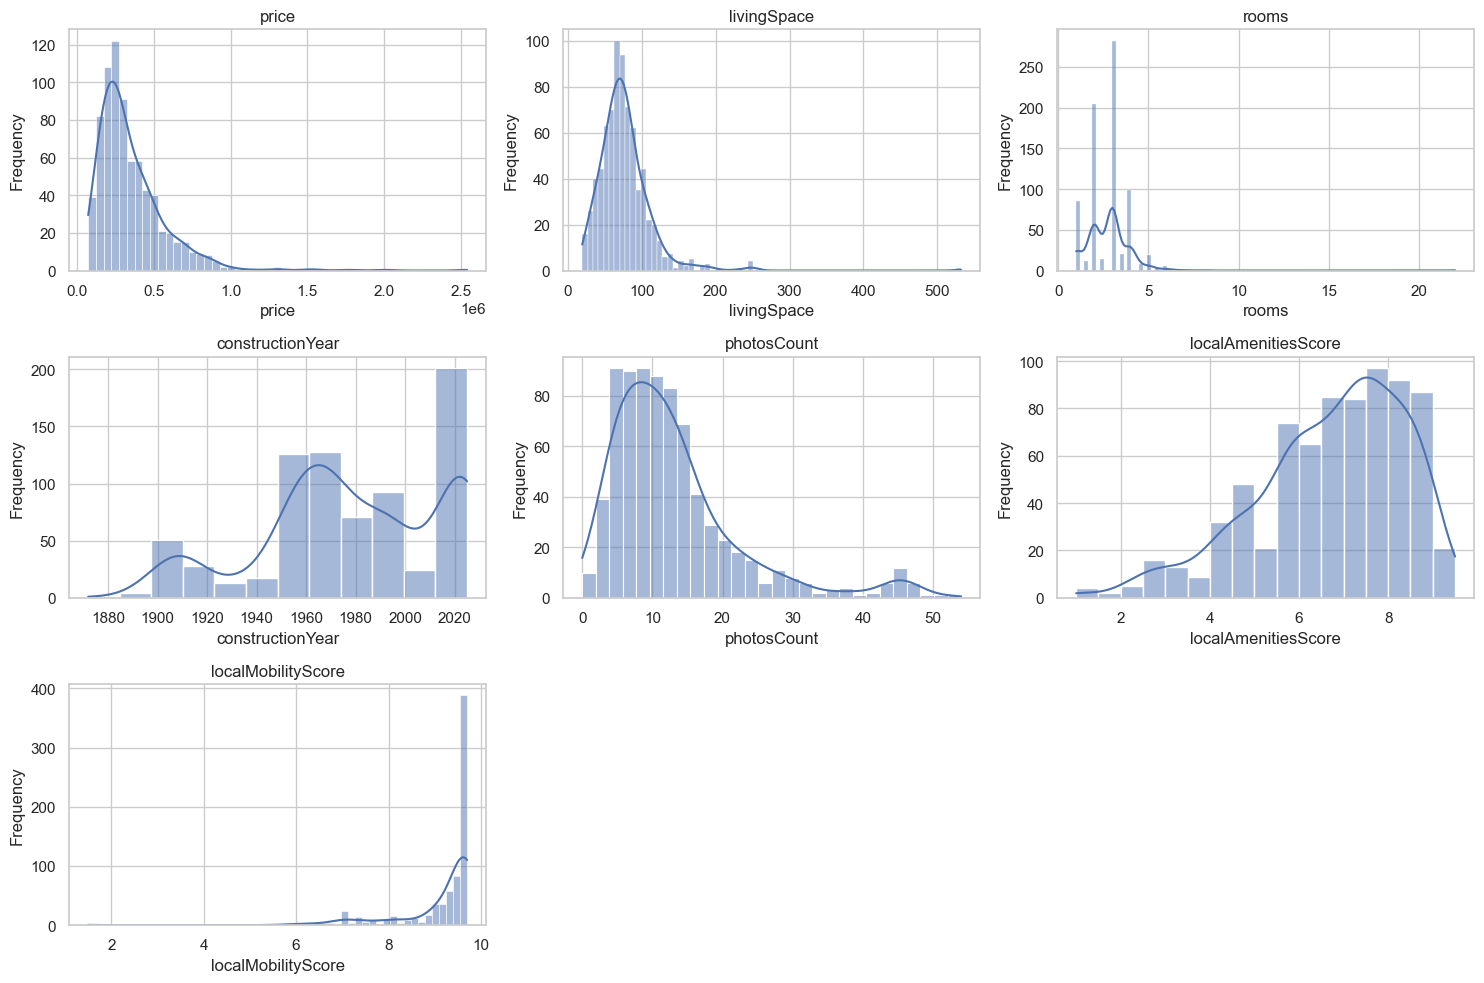

In [282]:
sns.set(style="whitegrid")

# Variablen für die Darstellung
variables = ['price', 'livingSpace', 'rooms', 'constructionYear', 
             'photosCount', 'localAmenitiesScore', 'localMobilityScore']

# Histogramme
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    sns.histplot(train_df[var], kde=True)
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Die Histogramme bieten einen detaillierten Einblick in die Verteilungen der ausgewählten Variablen:

- **Preis (price)**
  - Verteilung: Rechtsschief
  - Beobachtung: Konzentration an niedrigeren Preisen; einige Immobilien mit sehr hohen Preisen

- **Wohnfläche (livingSpace)**
  - Verteilung: Rechtsschief
  - Beobachtung: Meistens kleinere bis mittlere Wohnflächen

- **Zimmeranzahl (rooms)**
  - Verteilung: Überwiegend niedrig bis mittel (1 bis 4 Zimmer)

- **Baujahr (constructionYear)**
  - Verteilung: Spitzen in bestimmten Perioden (trimodal)
  - Beobachtung: Mögliche Reflexion historischer Bauwellen

- **Anzahl der Fotos (photosCount)**
  - Verteilung: Meistens gering bis mittel

- **Bewertung der lokalen Annehmlichkeiten (localAmenitiesScore)**
  - Verteilung: Relativ gleichmäßig, leichte Tendenz zu höheren Werten
  - Beobachtung: Deutet auf generell gute Qualität lokaler Annehmlichkeiten hin

- **Bewertung der lokalen Mobilität (localMobilityScore)**
  - Verteilung: Tendenz zu höheren Werten
  - Beobachtung: Hinweis auf gute Verkehrsanbindung in den gelisteten Immobilien

#### Scatterplots 
Um die Beziehung zwischen diesen Variablen und dem Immobilienpreis zu untersuchen.

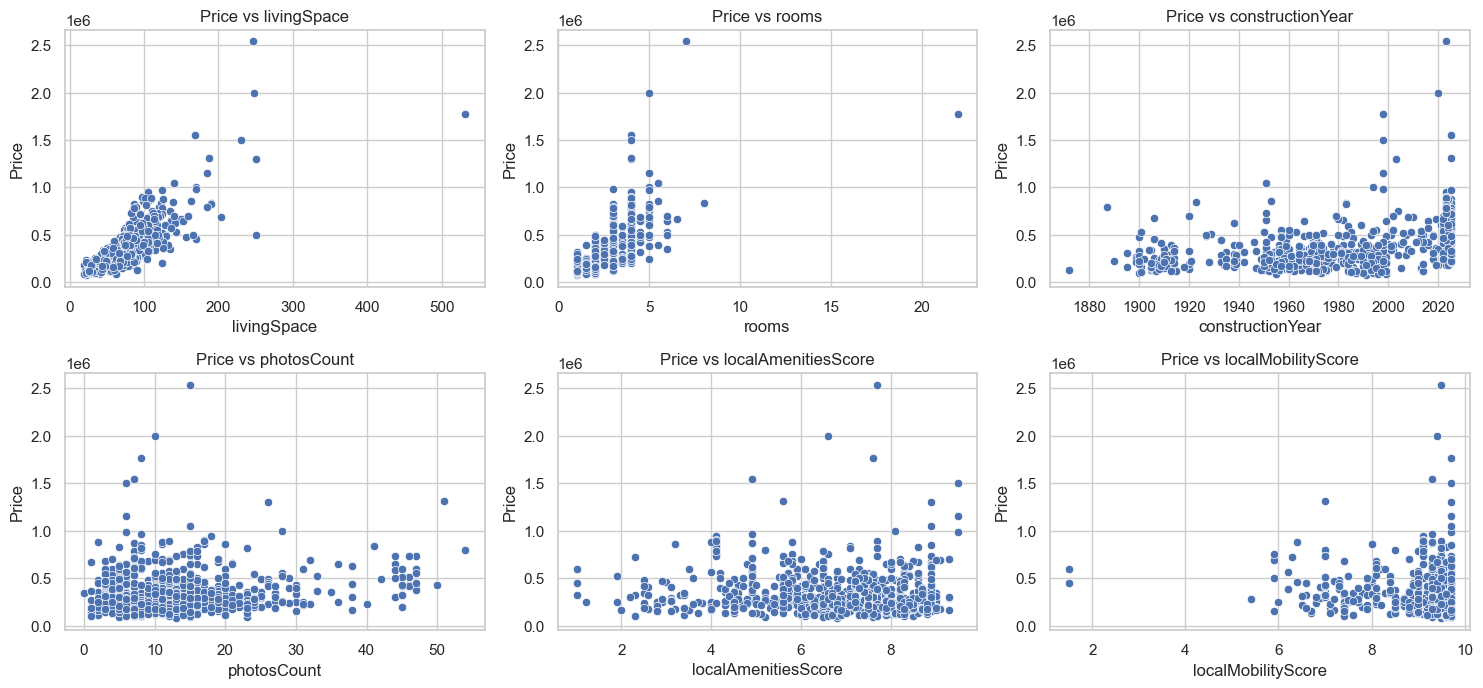

In [283]:
# Streudiagrammen zur Untersuchung der Beziehungen zwischen dem Preis und anderen Variablen
plt.figure(figsize=(15, 10))

for i, var in enumerate(variables[1:], 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=train_df[var], y=train_df['price'])
    plt.title(f'Price vs {var}')
    plt.xlabel(var)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

- **Wohnfläche (livingSpace)**
  - Beziehung: Positive Korrelation mit dem Preis
  - Beobachtung: Größere Immobilien tendieren dazu, teurer zu sein

- **Zimmeranzahl (rooms)**
  - Beziehung: Positive Beziehung zum Preis
  - Beobachtung: Einige Ausreißer vorhanden

- **Baujahr (constructionYear)**
  - Beziehung: Nicht eindeutig zum Preis
  - Beobachtung: Sowohl neue als auch alte Immobilien können hohe Preise erzielen

- **Anzahl der Fotos (photosCount)**
  - Beziehung: Keine klare Korrelation mit dem Preis
  - Beobachtung: Möglicherweise mehr mit Marketingstrategien als mit dem Immobilienwert verbunden

- **Bewertung der lokalen Annehmlichkeiten (localAmenitiesScore)**
  - Beziehung: Leichte Tendenz, dass höhere Bewertungen mit höheren Preisen korrelieren
  - Beobachtung: Beziehung ist nicht stark

- **Bewertung der lokalen Mobilität (localMobilityScore)**
  - Beziehung: Leichte Tendenz zu höheren Preisen bei besseren Mobilitätsbewertungen
  - Beobachtung: Beziehung ist nicht stark

#### Kategoriale Variablen

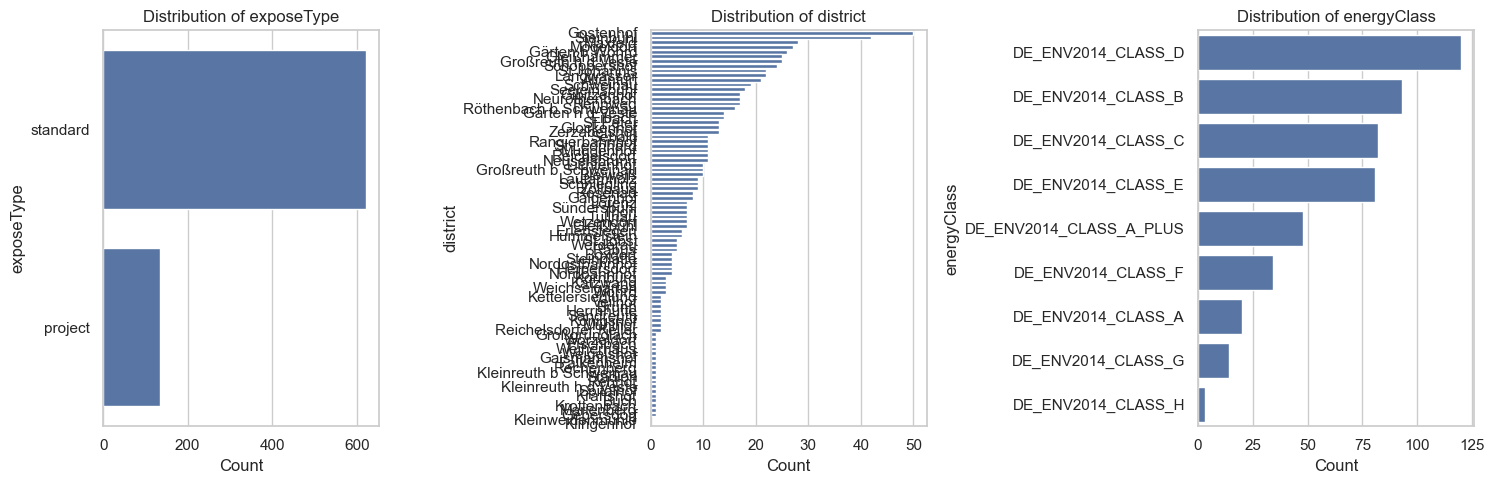

In [284]:
# Verteilung kategorialer Variablen
categorical_vars = ['exposeType', 'district', 'energyClass']

plt.figure(figsize=(15, 5))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(1, 3, i)
    sns.countplot(y=train_df[var], order = train_df[var].value_counts().index)
    plt.title(f'Distribution of {var}')
    plt.xlabel('Count')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

- **ExposeType**
  - Kategorien: Zwei Typen - Standard (Bestandsimmobilie) und Projekt (Neubauimmobilie oder projektiert)
  - Beobachtung: repräsentieren verschiedene Marktsegmente

- **Stadtteil (district)**
  - Beobachtung: Immobilien aus verschiedenen Stadtteilen, mit einigen Stadtteilen stärker vertreten
  - Interpretation: Könnte auf die Größe oder Beliebtheit der Stadtteile hindeuten

- **Energieklasse (energyClass)**
  - Beobachtung: Unterschiedliche Verteilung der Energieklassen, einige dominanter als andere
  - Interpretation: Möglicherweise beeinflusst durch Baujahr oder Baustandards

Als nächster Schritt werden wir die Auswirkung der kategorialen Variablen auf den Preis analysieren.  

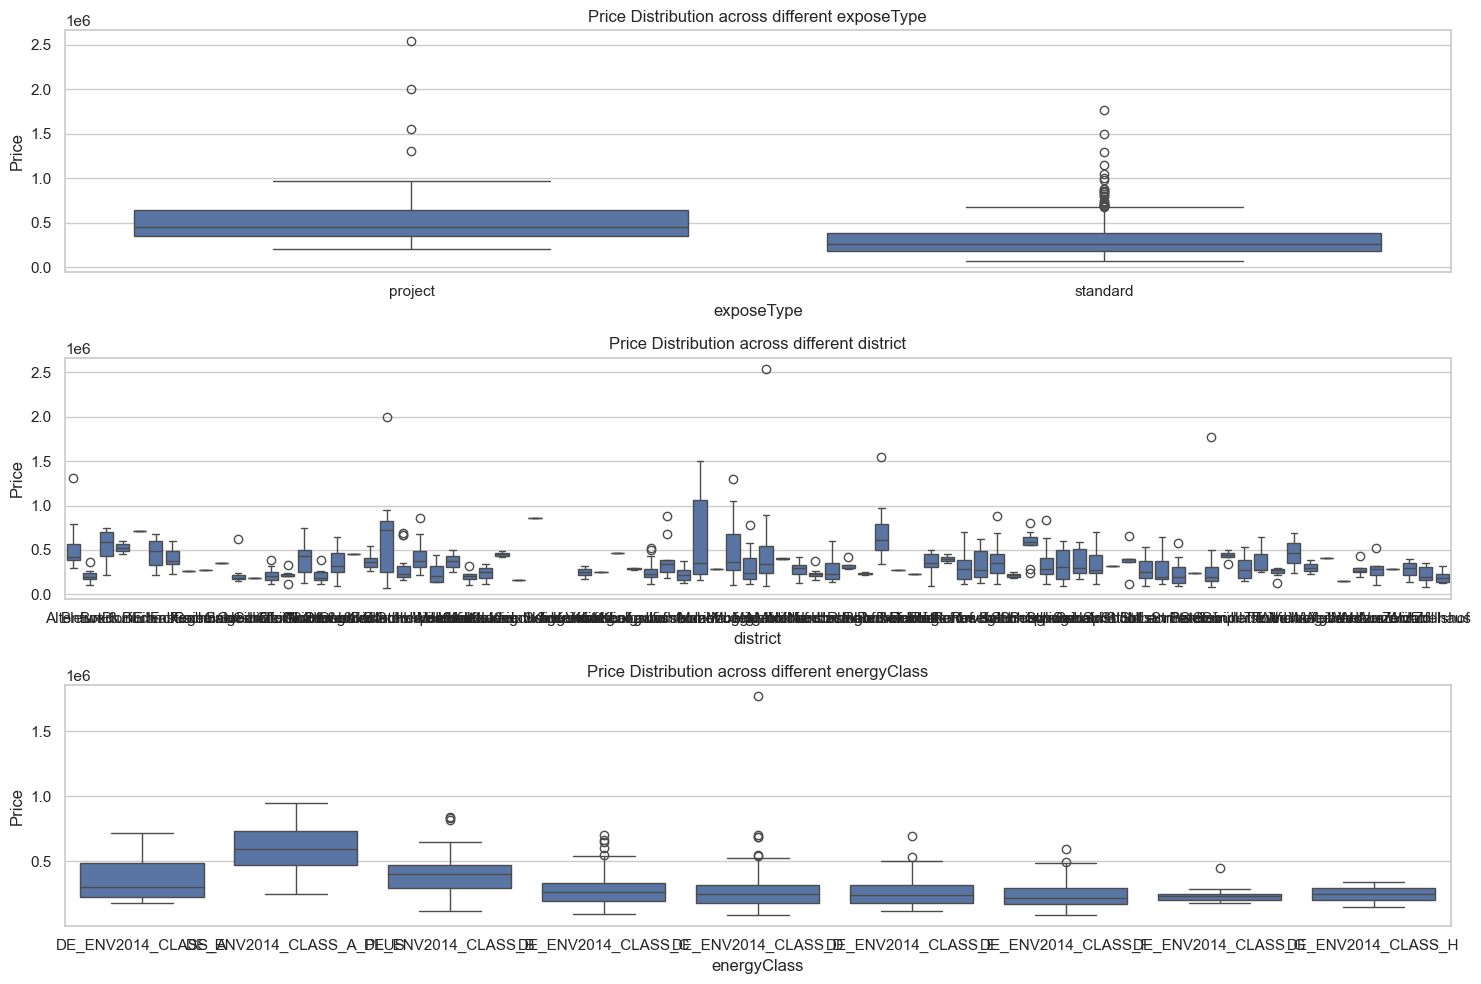

In [285]:
# Beziehung zwischen kategorialen Variablen und Preis
plt.figure(figsize=(15, 10))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x=var, y='price', data=train_df)
    plt.title(f'Price Distribution across different {var}')
    plt.xlabel(var)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

- **ExposeType**
  - Beobachtung: Variierende Preise je nach Expose-Typ
  - Interpretation: Unterschiedliche Preisspannen deuten auf einen Einfluss des Expose-Typs auf den Preis hin; Neubauwohnungen deutet auf höhere Preise

- **Stadtteil (district)**
  - Beobachtung: Deutliche Unterschiede im Medianpreis und in der Preisspanne zwischen verschiedenen Bezirken
  - Interpretation: Höhere Preise in einigen Bezirken könnten auf Unterschiede in Attraktivität, Lage, Infrastruktur und anderen lokalen Faktoren hinweisen

- **Energieklasse (energyClass)**
  - Beobachtung: Unterschiedliche Preisverteilungen zwischen verschiedenen Energieklassen
  - Interpretation: Höhere Medianpreise bei besseren Energieklassen könnten auf eine Präferenz für energieeffizientere Immobilien hindeuten

### Schlussfolgerung
- Kategoriale Variablen wie Expose-Typ, Bezirk und Energieklasse können wichtige Faktoren bei der Bestimmung des Immobilienpreises sein.

### Binäre Variablen

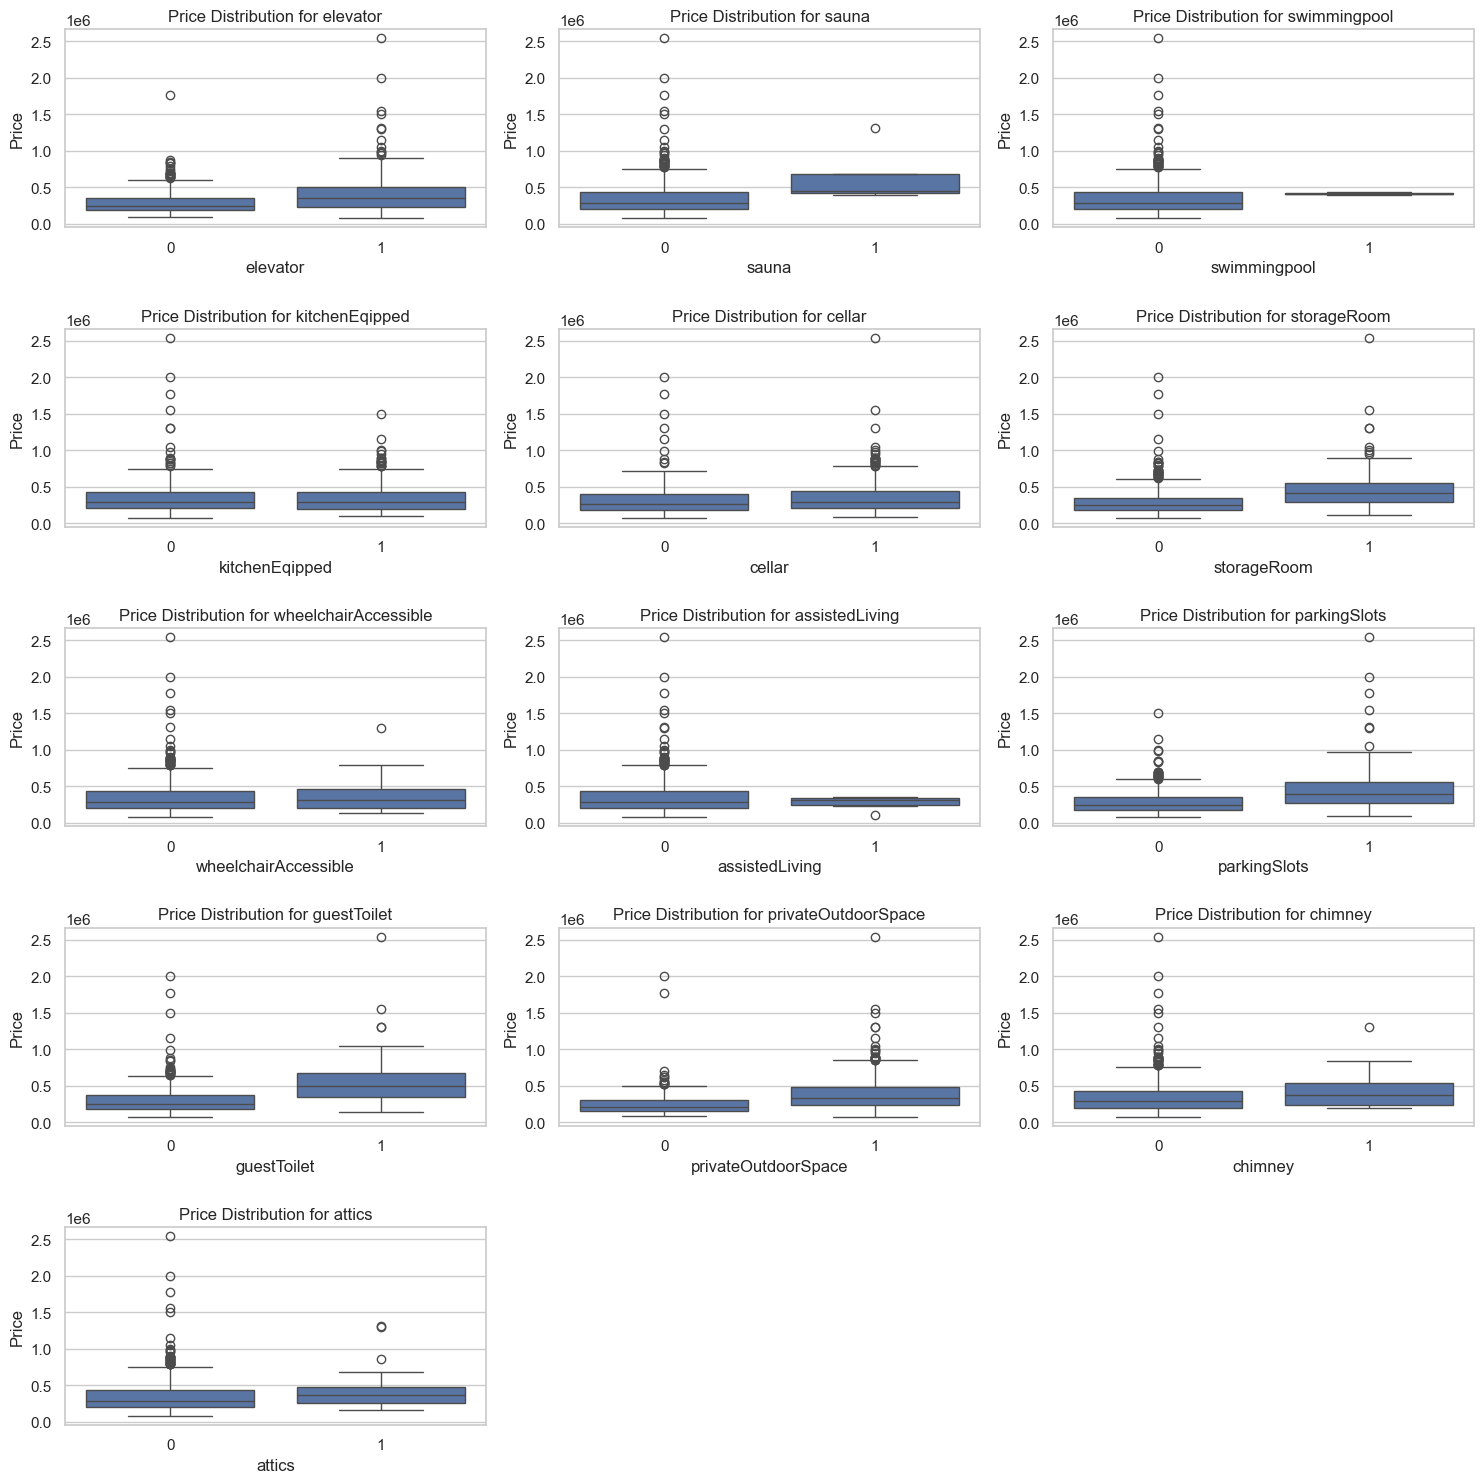

['elevator',
 'sauna',
 'swimmingpool',
 'kitchenEqipped',
 'cellar',
 'storageRoom',
 'wheelchairAccessible',
 'assistedLiving',
 'parkingSlots',
 'guestToilet',
 'privateOutdoorSpace',
 'chimney',
 'attics']

In [286]:
# Binäre Variablen
binaryVars = ['elevator',
 'sauna',
 'swimmingpool',
 'kitchenEqipped',
 'cellar',
 'storageRoom',
 'wheelchairAccessible',
 'assistedLiving',
 'parkingSlots',
 'guestToilet',
 'privateOutdoorSpace',
 'chimney',
 'attics']

# Untersuchung des Einflusses binärer Variablen auf den Preis
plt.figure(figsize=(15, 15))

for i, var in enumerate(binaryVars, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=train_df[var], y=train_df['price'])
    plt.title(f'Price Distribution for {var}')
    plt.xlabel(var)
    plt.ylabel('Price')

plt.tight_layout()
plt.show()

binaryVars

## Einfluss Binärer Variablen auf den Immobilienpreis

- **elevator, sauna, swimmingpool, kitchenEquipped, cellar, storageRoom, wheelchairAccessible, assistedLiving, parkingSlots, guestToilet, privateOutdoorSpace, chimney, attics**
  - Beobachtung: Unterschiede im Medianpreis zwischen Immobilien mit und ohne diese Merkmale
  - Interpretation: Merkmale wie Aufzug, Sauna und Parkplätze haben einen deutlichen Einfluss auf den Preis, erkennbar an unterschiedlichen Preisverteilungen

### Relationships

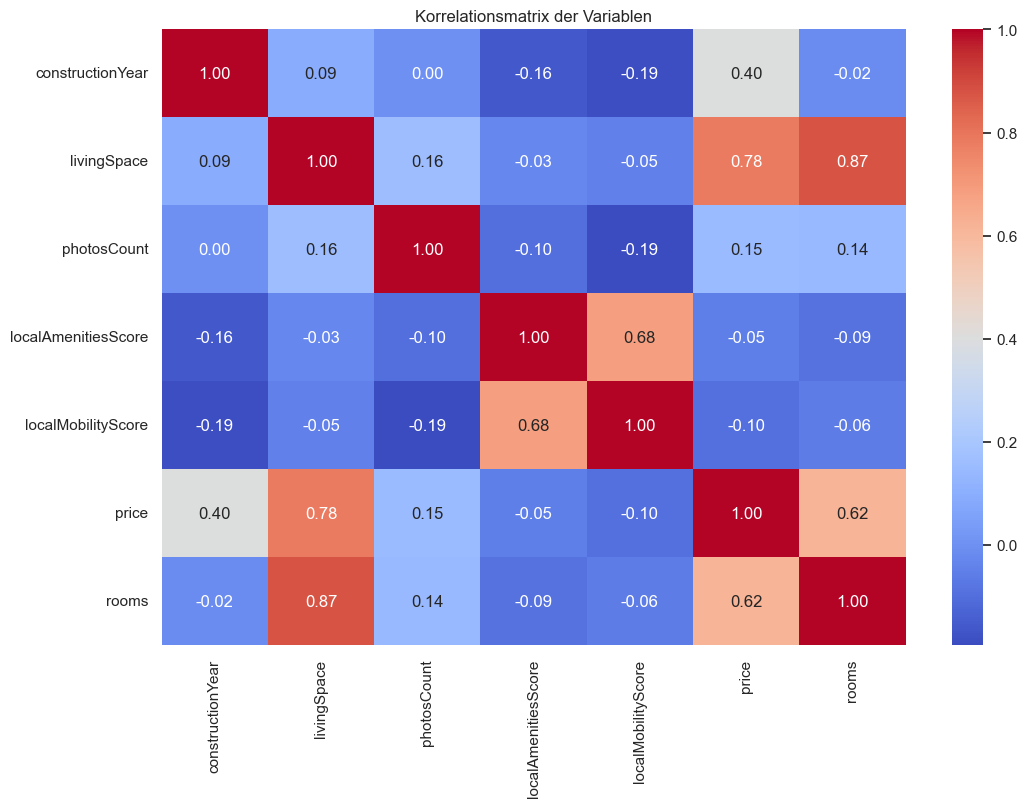

In [287]:
# Erstellen einer Korrelationsmatrix
correlationMatrix = train_df.select_dtypes(include=['float64', 'int64']).corr()

# # Visualisierung der Korrelationsmatrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korrelationsmatrix der Variablen")
plt.show()

## Model

### Select model

### Training and validation

In [288]:
# Lineares Regressionsmodell erstellen und trainieren
model = LinearRegression()
#model.fit(X_train, y_train) # X_train, y_train ??? # die Varibalen sind nirgendwo definiert

### Fit model

In [289]:
# estimate the model and save it as lm (linear model)
import statsmodels.api as sm
from statsmodels.formula.api import ols
lm = ols("price ~ livingSpace + guestToilet + constructionYear + privateOutdoorSpace + parkingSlots + sauna + elevator + latitudeDistrict + longitudeDistrict", data=df).fit()

In [290]:
# print regression results
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     41.15
Date:                Sun, 17 Dec 2023   Prob (F-statistic):          2.78e-253
Time:                        15:16:11   Log-Likelihood:                -12251.
No. Observations:                 947   AIC:                         2.468e+04
Df Residuals:                     856   BIC:                         2.513e+04
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

c:\Users\Lena\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:848: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)


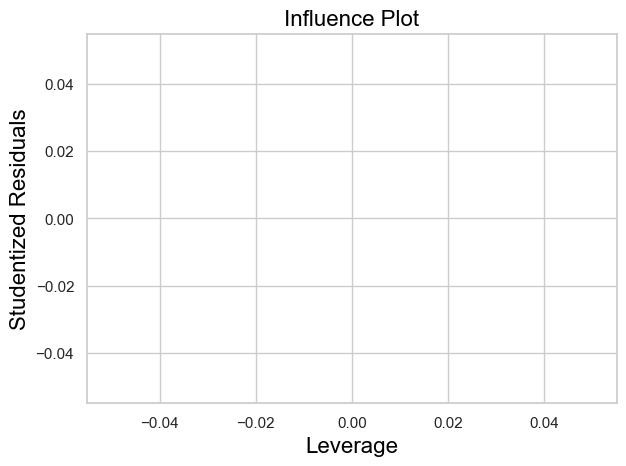

In [291]:
fig = sm.graphics.influence_plot(lm, criterion="cooks")
fig.tight_layout(pad=1.0)

In [292]:
# obtain Cook's distance 
lm_cooksd = lm.get_influence().cooks_distance[0]

# get length of df to obtain n
n = len(df["price"])

# calculate critical d
critical_d = 4/n
print('Critical Cooks distance:', critical_d)

# identification of potential outliers with leverage
out_d = lm_cooksd > critical_d

# output potential outliers with leverage
print(df.index[out_d], "\n", 
    lm_cooksd[out_d])

Critical Cooks distance: 0.004223864836325237
Int64Index([  0,  74,  92, 123, 277, 284, 312, 359, 449, 451, 543, 562, 658,
            675, 681, 682, 697, 747, 765, 790, 870, 875, 884, 922, 933, 940],
           dtype='int64') 
 [4.99121627e-02 9.53261209e-03 6.99569267e-01 1.16823049e-01
 2.76375538e-01 5.15997045e-02 1.29457234e-02 7.27165809e-03
 3.88987308e-02 1.16472725e-02 6.59243585e-01 7.27165809e-03
 6.41458038e-03 1.23042170e-02 9.18398994e-03 4.47196296e-03
 9.64942945e-03 1.55964855e-02 4.40511183e-03 1.60203281e+00
 7.47407825e+01 8.22538024e-01 1.17238011e+00 3.59069522e+00
 1.29457234e-02 1.87599263e-02]


Fehlende Werte ersetzen

brauchen wir diese Varibelen noch??? Ja :) werde ich jetzt einbauen

In [293]:
energyClasses = {
    "DE_ENV2014_CLASS_A_PLUS": 1,
    "DE_ENV2014_CLASS_A": 2,
    "DE_ENV2014_CLASS_B": 3,
    "DE_ENV2014_CLASS_C": 4,
    "DE_ENV2014_CLASS_D": 5,
    "DE_ENV2014_CLASS_E": 6,
    "DE_ENV2014_CLASS_F": 7,
    "DE_ENV2014_CLASS_G": 8,
    "DE_ENV2014_CLASS_H": 9
}
df["energyClass"].replace(energyClasses, inplace=True)


In [294]:
# zuviele fehlende Variablen
equipments = {
    "möbliert": 1,
    "teilweise möbliert": 2, 
    "neuwertig": 3,
    "teilweise möbliert, neuwertig": 4,
    "möbliert, neuwertig": 5
}

In [295]:
df.isna().sum()

constructionYear          0
livingSpace               0
exposeType                0
photosCount               0
localAmenitiesScore       3
localMobilityScore        3
latitudeDistrict          0
longitudeDistrict         0
district                  0
price                     0
rooms                     0
energyClass             326
floor                   160
energy                  161
elevator                  0
sauna                     0
swimmingpool              0
kitchenEqipped            0
cellar                    0
storageRoom               0
wheelchairAccessible      0
assistedLiving            0
parkingSlots              0
guestToilet               0
privateOutdoorSpace       0
chimney                   0
attics                    0
dtype: int64